#  **Analysing the 2024 Stack Overflow Developer Survey 🧑🏻‍💻**

## Project Structure
1. **About the Project**
2. **Understanding the Dataset**
3. **Questions to ask the dataset**
4. **Importing and Exploring the dataset**
5. **Exploratory Data Analysis**
6. **Answering the Key Questions with Data**
7. **Conclusion and Insights**

## 1. About the Project

### Project Overview
The Stack Overflow Developer Survey is one of the most comprehensive sources of information on developer trends, technologies, and work environments. Conducted annually, the survey gathers responses from tens of thousands of developers worldwide, providing insights into the programming languages they use, the tools they prefer, and the challenges they face in their careers.

In this project, I will anlayse the 2024 Stack Overflow Developer Survey dataset to uncover trends in technology adoption, job satisfaction, and the impact of AI on software development. This analysis will provide valuable insights for developers, employers, educators, and policymakers in the tech industry.

### Objectives of the Analysis
- **Identifying Popular Technologies**: Determine the most used and most desired programming languages, frameworks, and databases.
- **Understanding AI Adoption**: Analyse how developers use AI tools, their perception of AI’s accuracy, and concerns about job displacement.
- **Exploring Job Satisfaction and Compensation**: Investigate how job roles, experience, and education levels impact salary and career satisfaction.
- **Examining Developer Productivity and Challenges**: Identify factors that hinder or enhance productivity, such as workplace challenges, learning resources, and knowledge silos.
- **Assessing Stack Overflow Usage**: Explore how developers engage with Stack Overflow and other learning platforms to improve their skills.

## 2. Understanding the Dataset

### About the Dataset
The 2024 Stack Overflow Developer Survey dataset consists of responses from over 65,000 developers worldwide. The survey was conducted to gain insights into the software development community, covering topics such as:
- Programming languages, tools, and frameworks developers use and want to learn.
- Employment status, job roles, and salaries.
- AI adoption and its impact on development workflows.
- Developer education, learning resources, and community participation.

This dataset is a valuable resource for understanding industry trends, developer preferences, and challenges faced by professionals in the field.

## 3. Questions to Ask the Dataset
**Q1: How are developers using AI in their workflow, and how do they perceive its accuracy and impact on their jobs?**

**Q2: What are the most popular programming languages, frameworks, and tools among developers in 2024?**

**Q3: How do employment status, compensation, and job satisfaction vary across different demographics (age, education, experience level)?**

**Q4: What are the biggest challenges developers face in their work environment, and how do they impact productivity?**

**Q5: How do developers engage with Stack Overflow and other learning resources to enhance their skills?**

## 4. Importing and Exploring the Data

### Loading the Dataset

In [15]:
#importing necessary libraries
import pandas as pd #Data manipulation and analysis (handling DataFrames).
import matplotlib.pyplot as plt #Basic plotting and data visualization.
import seaborn as sns #Statistical data visualization with beautiful graphs.
from wordcloud import WordCloud #Generating word clouds for text analysis.
from collections import Counter #A dict subclass for counting hashable objects

#Importing the data
#The data was downloaded form this link: https://survey.stackoverflow.co/
dataset = 'survey_results_public.csv'
df = pd.read_csv(dataset)

# Display the first few rows
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Data Types and Summary Statistics

In [16]:
# Check data types
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### Checking for Missing Values

In [17]:
# Check for missing values
missing_values = df.isnull().sum()

#display the full column list
pd.set_option('display.max_rows', None)

# Display columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

AINextMuch less integrated        64289
AINextLess integrated             63082
AINextNo change                   52939
AINextMuch more integrated        51999
EmbeddedAdmired                   48704
EmbeddedWantToWorkWith            47837
EmbeddedHaveWorkedWith            43223
ConvertedCompYearly               42002
AIToolNot interested in Using     41023
AINextMore integrated             41009
Knowledge_9                       37802
Frequency_3                       37727
Knowledge_8                       37679
ProfessionalTech                  37673
Knowledge_7                       37659
Knowledge_6                       37573
Knowledge_5                       37557
Knowledge_2                       37416
Knowledge_4                       37407
Knowledge_3                       37342
Frustration                       37186
Frequency_2                       37073
Frequency_1                       37068
ProfessionalCloud                 36946
Knowledge_1                       36773


### Handling Duplicates and Cleaning Data

In [18]:
# Drop columns with >50,000 missing values
columns_to_drop = missing_values[missing_values > 50000].index
df.drop(columns=columns_to_drop, inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# Fill missing values for categorical columns with "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Fill missing values for numerical columns with the median of each column
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

# Remove duplicates if necessary
df = df.drop_duplicates()

# Display the first few rows
df.head()

Duplicate rows: 0


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMore integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States of America,Unknown,110000.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,I have never visited Stack Overflow or the Sta...,Unknown,Unknown,Unknown,Unknown,Unknown,Yes,Very favorable,Increase productivity,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No,Unknown,9.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,10.0,0.0,0.0,20.0,15.0,10.0,5.0,0.0,0.0,Unknown,Unknown,65000.0,7.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",Unknown,Unknown,Unknown,Unknown,Unknown,United Kingdom of Great Britain and Northern I...,Unknown,110000.0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,Unknown,Unknown,Unknown,Microsoft Teams;Slack,Slack,Slack,Unknown,Unknown,Unknown,Stack Overflow for Teams (priva

## 5. Exploratory Data Analysis (EDA)
### Understanding Developer Demographics

#### Objective:
- Analyse the age distribution, education level, and employment status of developers.

<function matplotlib.pyplot.show(close=None, block=None)>

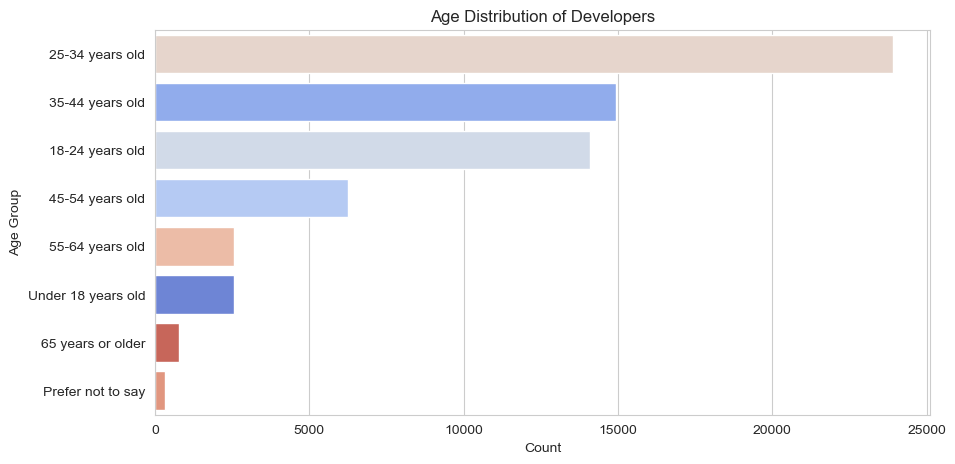

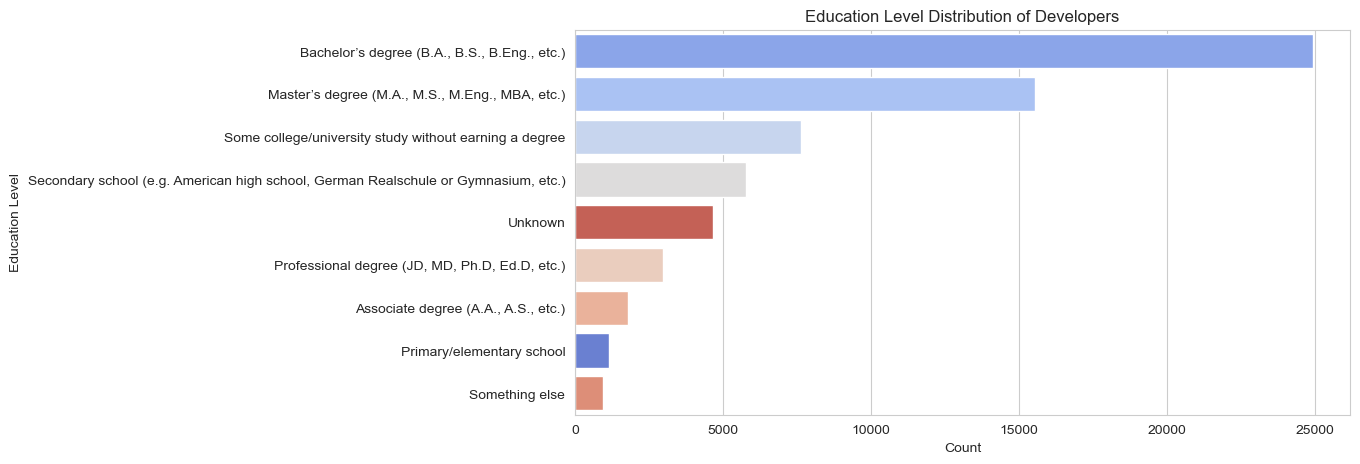

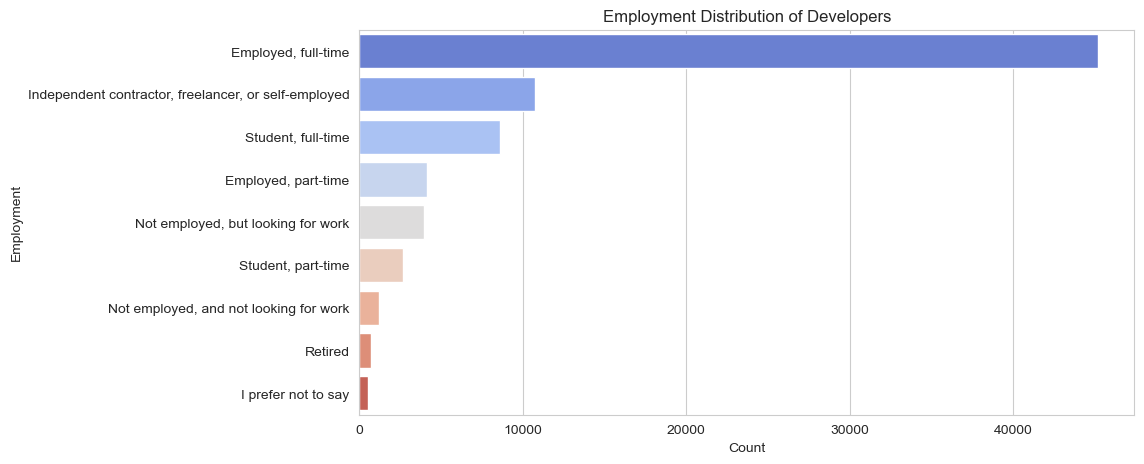

In [19]:
# Set style for plots
sns.set_style("whitegrid")

# Plot Age Distribution (Fixed Version)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Age", order=df["Age"].value_counts().index, hue="Age", palette="coolwarm", legend=False)
plt.title("Age Distribution of Developers")
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.show

# Plot Education Level Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="EdLevel", order=df["EdLevel"].value_counts().index, hue="EdLevel", palette="coolwarm", legend=False)
plt.title("Education Level Distribution of Developers")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show

#Barplot for the distribution of Employment
# Function to count occurrences of Employment
def count_empoccurrences(column):
    emp_list = df[column].dropna().str.split(";")  # Split multiple values in a single entry
    emp_counts = Counter([emp.strip() for sublist in emp_list for emp in sublist])  # Strip spaces
    return pd.DataFrame(emp_counts.items(), columns=["Employment", "Count"]).sort_values(by="Count", ascending=False)

employment_counts = count_empoccurrences("Employment")

# Plot Employment status Distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=employment_counts.head(10), x="Count", y="Employment", hue="Employment", palette="coolwarm", legend=False)
plt.title("Employment Distribution of Developers")
plt.xlabel("Count")
plt.ylabel("Employment")
plt.show

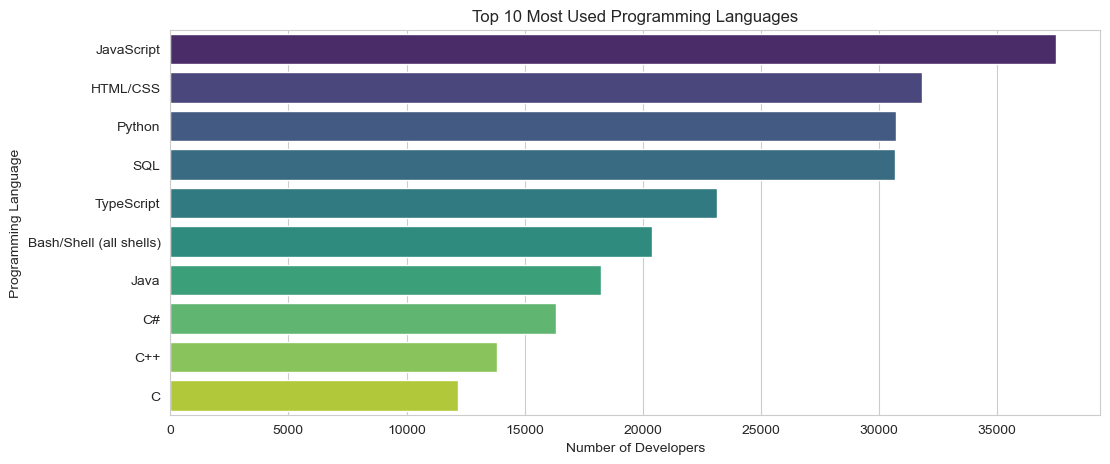

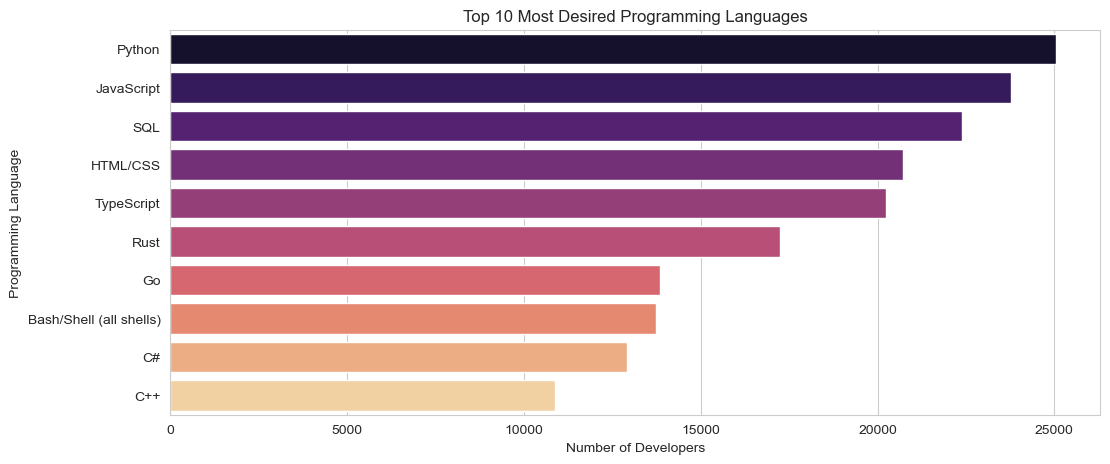

In [20]:
from collections import Counter

# Function to count occurrences of languages
def count_occurrences(column):
    lang_list = df[column].dropna().str.split(";")  # Split multiple values in a single entry
    lang_counts = Counter([lang.strip() for sublist in lang_list for lang in sublist])  # Strip spaces
    return pd.DataFrame(lang_counts.items(), columns=["Language", "Count"]).sort_values(by="Count", ascending=False)

# Get most used and desired languages
used_languages = count_occurrences("LanguageHaveWorkedWith")
wanted_languages = count_occurrences("LanguageWantToWorkWith")

# Fix for Most Used Languages plot
plt.figure(figsize=(12, 5))
sns.barplot(data=used_languages.head(10), x="Count", y="Language", hue="Language", legend=False, palette="viridis")
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()

# Fix for Most Desired Languages plot
plt.figure(figsize=(12, 5))
sns.barplot(data=wanted_languages.head(10), x="Count", y="Language", hue="Language", legend=False, palette="magma")
plt.title("Top 10 Most Desired Programming Languages")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()

### AI Adoption Among Developers

#### Objective:
- Explore how developers are using AI, their trust in AI, and whether they feel AI is a threat to their jobs.

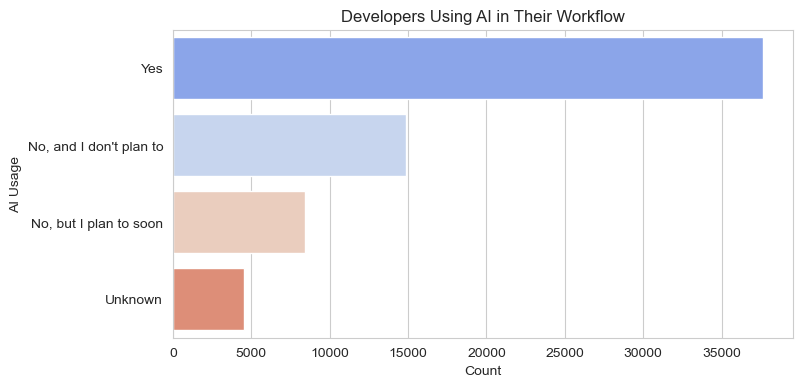

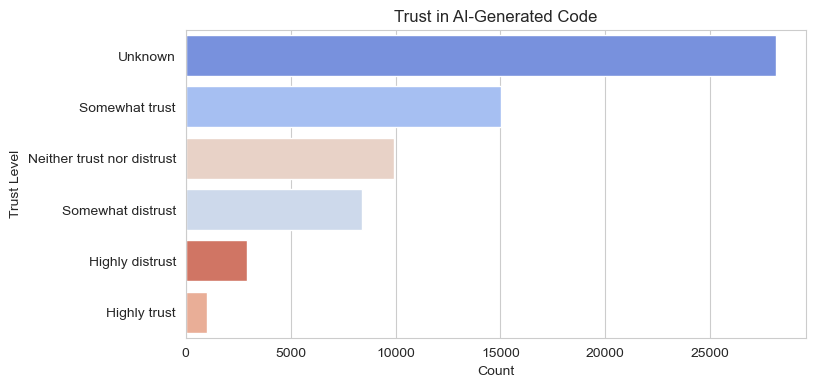

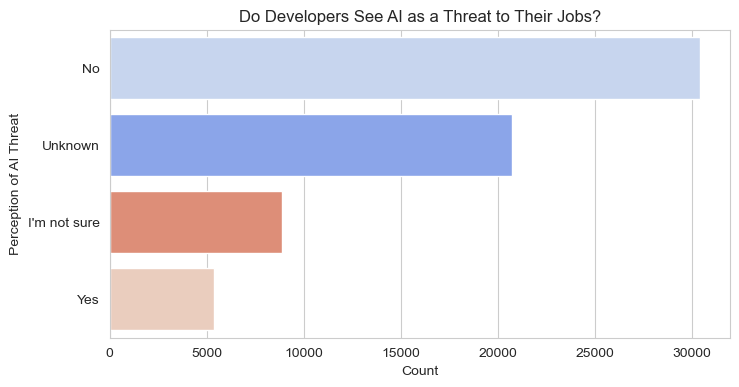

In [21]:
# Set Seaborn style
sns.set_style("whitegrid")

# AI Usage among Developers (Fixed)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="AISelect", hue="AISelect", order=df["AISelect"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Developers Using AI in Their Workflow")
plt.xlabel("Count")
plt.ylabel("AI Usage")
plt.show()

# AI Trust Levels (Fixed)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="AIAcc", hue="AIAcc", order=df["AIAcc"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Trust in AI-Generated Code")
plt.xlabel("Count")
plt.ylabel("Trust Level")
plt.show()

# AI as a Job Threat (Fixed)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="AIThreat", hue="AIThreat", order=df["AIThreat"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Do Developers See AI as a Threat to Their Jobs?")
plt.xlabel("Count")
plt.ylabel("Perception of AI Threat")
plt.show()

### Stack Overflow Usage Trends

#### Objective:
- Analyze how frequently developers visit and participate in Stack Overflow.

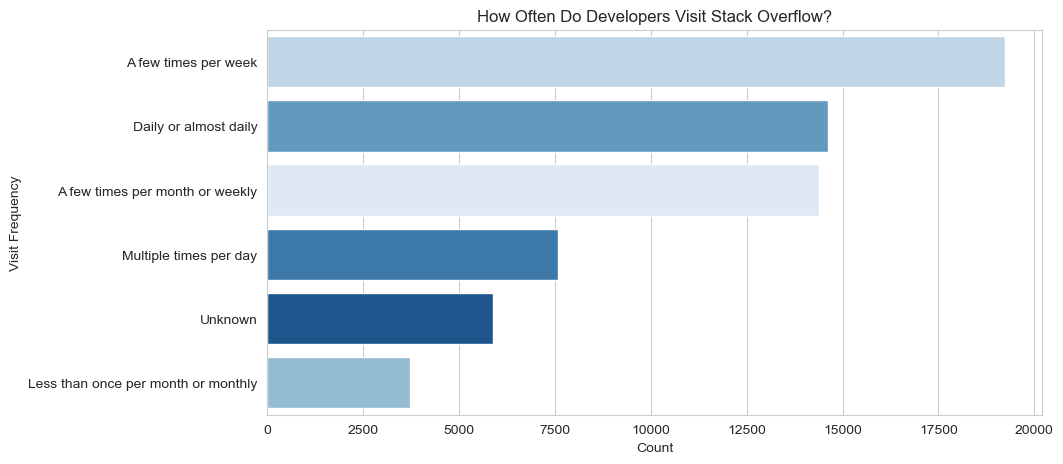

In [22]:
# Plot Stack Overflow Visit Frequency
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="SOVisitFreq", palette="Blues_r", order=df["SOVisitFreq"].value_counts().index, hue="SOVisitFreq", legend=False)
plt.title("How Often Do Developers Visit Stack Overflow?")
plt.xlabel("Count")
plt.ylabel("Visit Frequency")
plt.show()

## 6. Answering the Key Questions with Data

In this section, we will answer the five key questions using data analysis, visualizations, and insights.

### Q1: How are developers using AI in their workflow, and how do they perceive its accuracy and impact on their jobs?

#### Analysis:

We will explore:
- How many developers use AI tools in their workflow.
- Their trust in AI-generated output.
- Whether they perceive AI as a threat to their jobs.


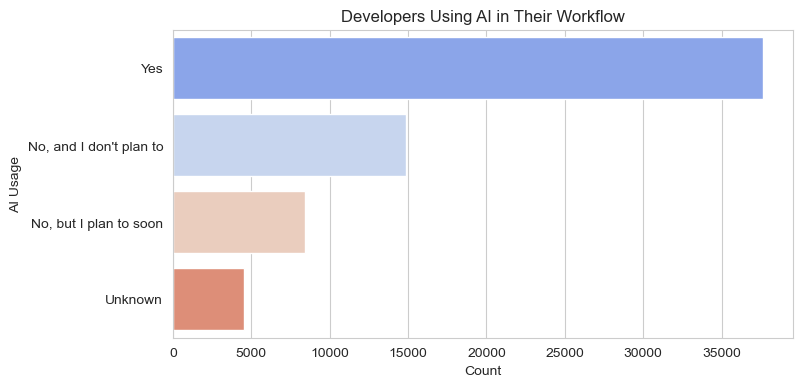

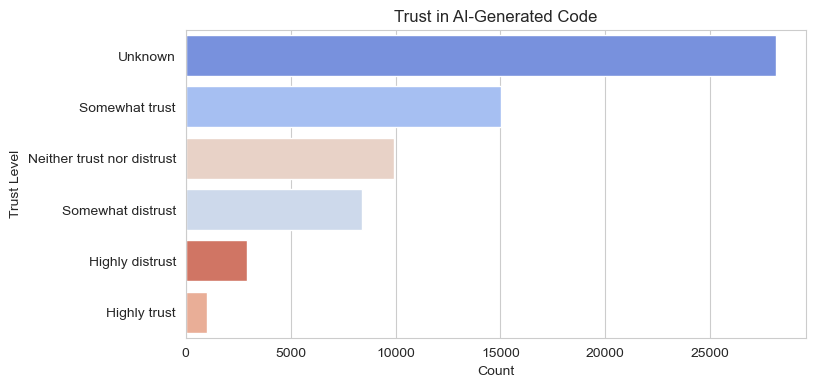

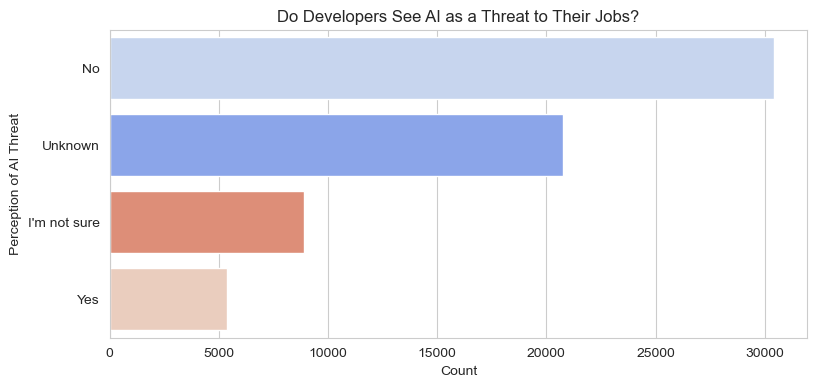

In [23]:
# AI Usage among Developers
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="AISelect", hue="AISelect", order=df["AISelect"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Developers Using AI in Their Workflow")
plt.xlabel("Count")
plt.ylabel("AI Usage")
plt.show()

# AI Trust Levels
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="AIAcc", hue="AIAcc", order=df["AIAcc"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Trust in AI-Generated Code")
plt.xlabel("Count")
plt.ylabel("Trust Level")
plt.show()

# AI as a Job Threat
plt.figure(figsize=(9, 4))
sns.countplot(data=df, y="AIThreat", hue="AIThreat", order=df["AIThreat"].value_counts().index, legend=False, palette="coolwarm")
plt.title("Do Developers See AI as a Threat to Their Jobs?")
plt.xlabel("Count")
plt.ylabel("Perception of AI Threat")
plt.show()

**💡 Insight**: While AI adoption is rising, distrust in outputs suggests tools need better transparency (e.g., explainable AI). The low perceived job threat aligns with developers using AI for repetitive tasks (e.g., boilerplate code), freeing time for complex problem-solving.

### Q2: What are the most popular programming languages, frameworks, and tools among developers in 2024?

#### Analysis:

- The most-used programming languages.
- The most-wanted programming languages (those developers want to learn).
- The most-used web frameworks.

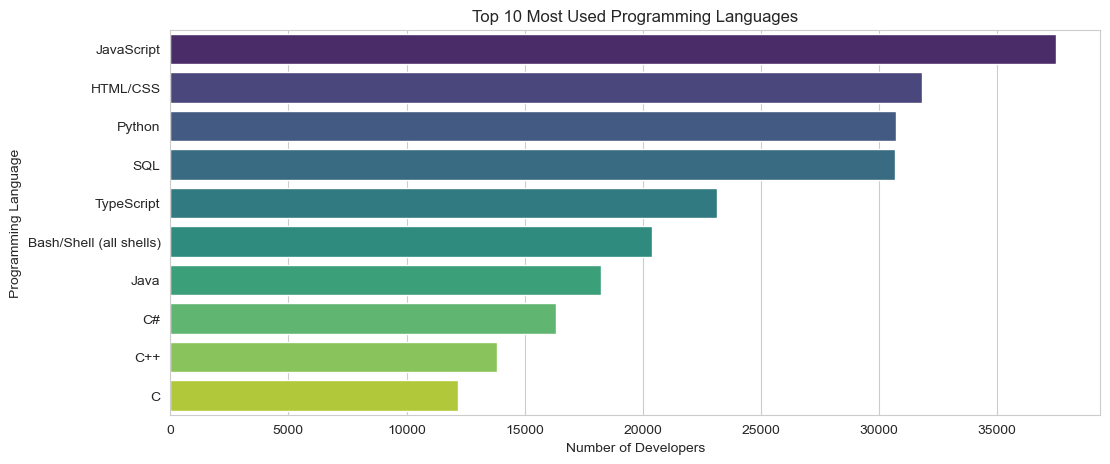

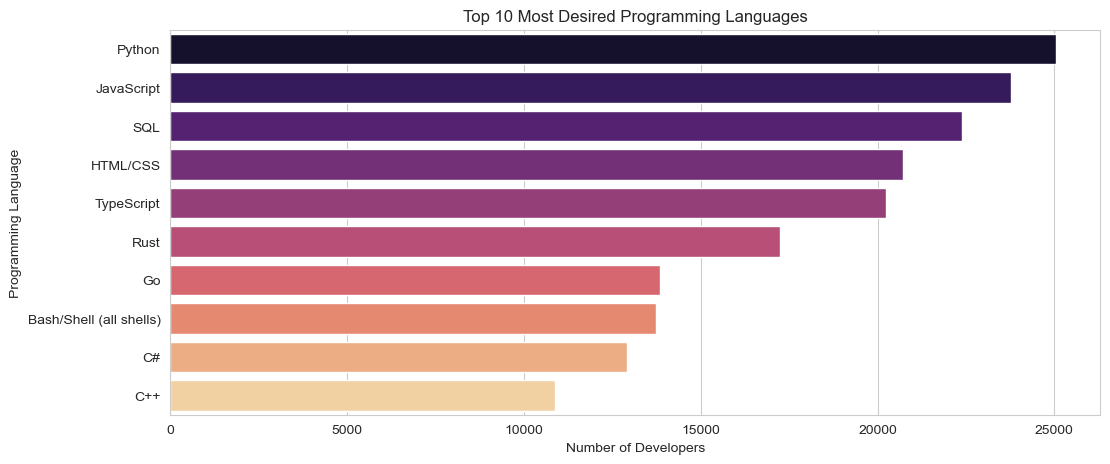

In [24]:
from collections import Counter

# Function to count occurrences of languages
def count_occurrences(column):
    lang_list = df[column].dropna().str.split(";")  # Split multiple values in a single entry
    lang_counts = Counter([lang.strip() for sublist in lang_list for lang in sublist])
    return pd.DataFrame(lang_counts.items(), columns=["Language", "Count"]).sort_values(by="Count", ascending=False)

# Get most used and desired languages
used_languages = count_occurrences("LanguageHaveWorkedWith")
wanted_languages = count_occurrences("LanguageWantToWorkWith")

# Plot Most Used Languages
plt.figure(figsize=(12, 5))
sns.barplot(data=used_languages.head(10), x="Count", y="Language", hue="Language", legend=False, palette="viridis")
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()

# Plot Most Desired Languages
plt.figure(figsize=(12, 5))
sns.barplot(data=wanted_languages.head(10), x="Count", y="Language", hue="Language", legend=False, palette="magma")
plt.title("Top 10 Most Desired Programming Languages")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()

**💡Insight**: JavaScript’s dominance reflects its role in full-stack development. Python’s dual leadership in usage and demand highlights its versatility in AI, scripting, and data science. Rust’s popularity among "desired" languages signals growing interest in memory-safe systems programming.

### Q3: How do employment status, compensation, and job satisfaction vary across different demographics?

#### Analysis:
- Salary distribution across developers.
- The relationship between years of experience and salary.
- Job satisfaction trends.

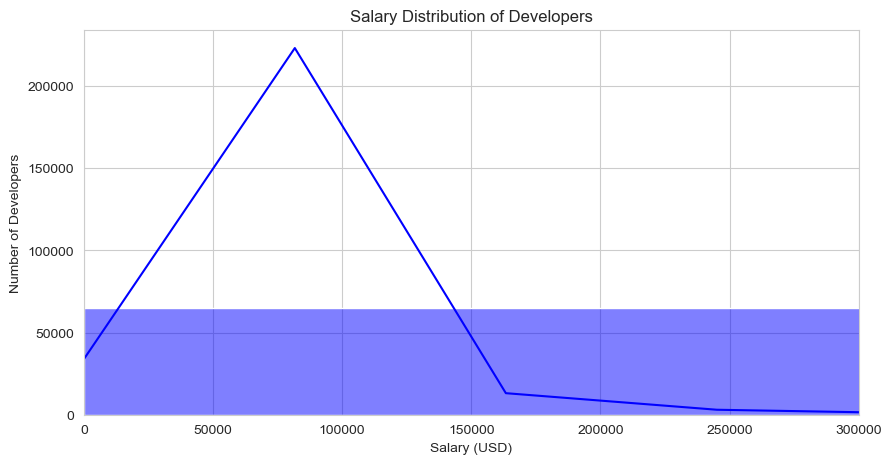

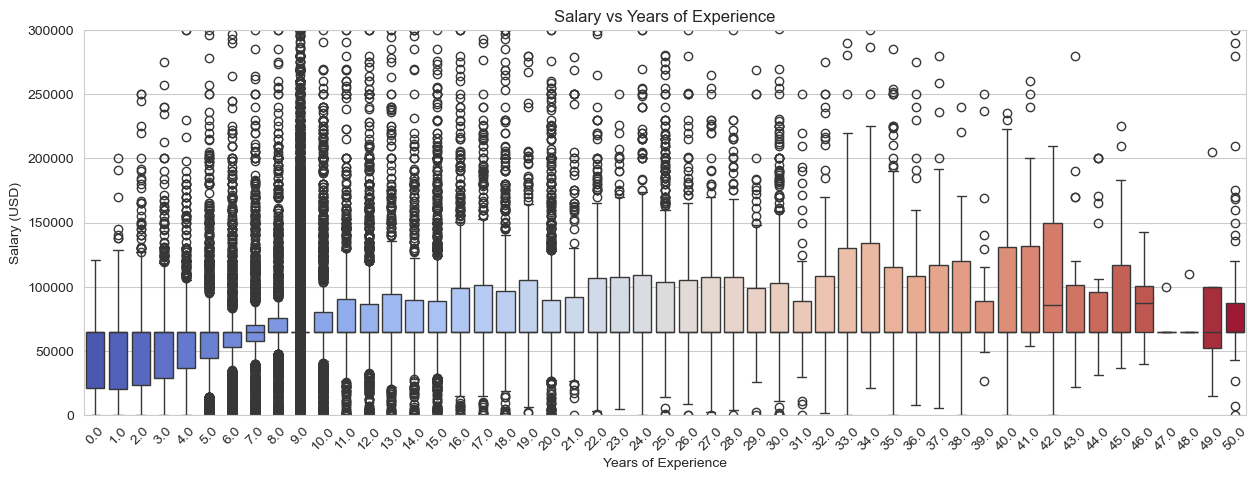

In [25]:
# Plot Salary Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["ConvertedCompYearly"], bins=50, kde=True, color="blue")
plt.xlim(0, 300000)  # Limit to remove outliers
plt.title("Salary Distribution of Developers")
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Developers")
plt.show()

# Salary vs Experience
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="WorkExp", y="ConvertedCompYearly", hue="WorkExp", palette="coolwarm", legend=False)
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.ylim(0, 300000)  # Limit to remove outliers
plt.xticks(rotation=45)
plt.show()

**💡Insight**: The plateau at 15+ years experience suggests companies undervalue institutional knowledge. Outliers (e.g., $1B salaries) likely represent executives or equity-heavy compensation, skewing averages.

### Q4: What are the biggest challenges developers face in their work environment, and how do they impact productivity?

#### Analysis:
- Top frustrations in the workplace.
- Time spent searching for solutions to problems.

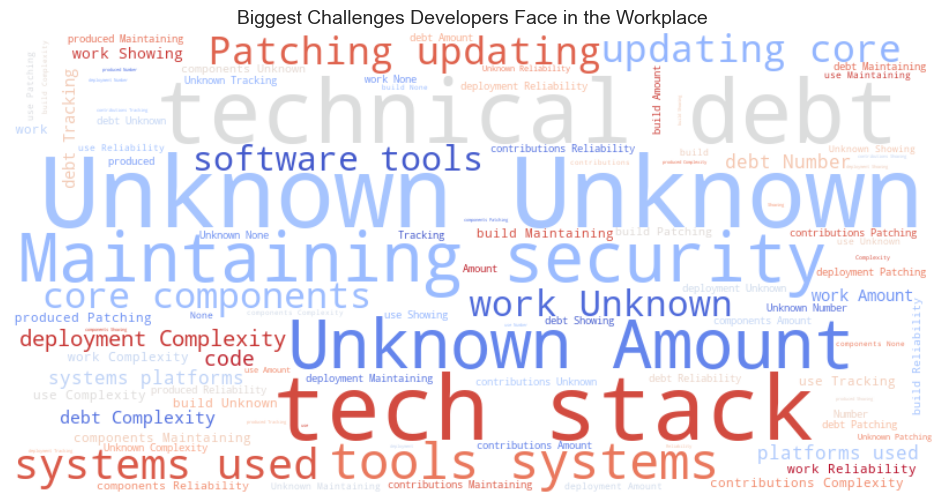

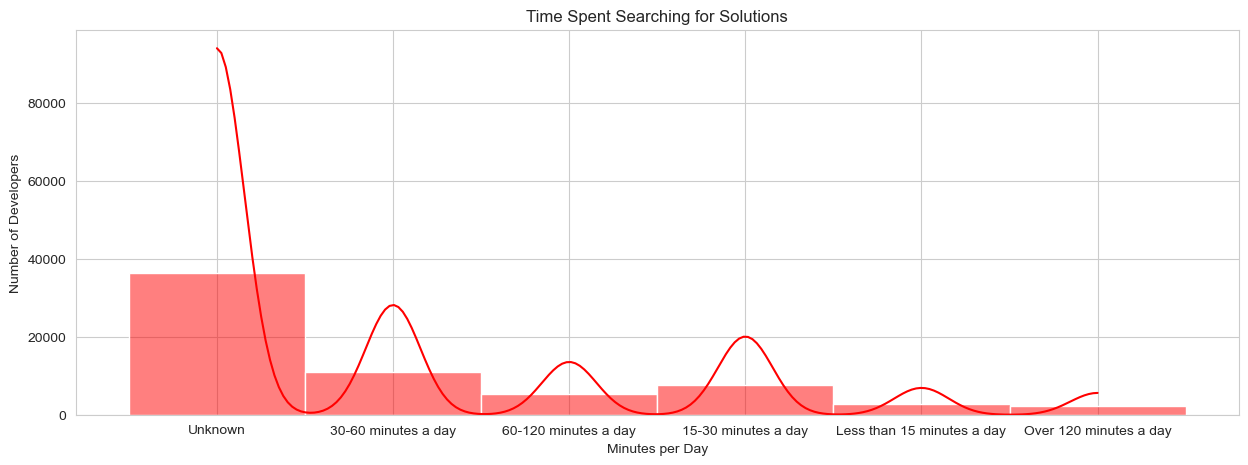

In [26]:
# Combine all frustration responses into a single text string
frustrations_text = " ".join(df["Frustration"].dropna())

# Generate Word Cloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm", max_words=100).generate(frustrations_text)

# Display Word Cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Biggest Challenges Developers Face in the Workplace", fontsize=14)
plt.show()

# Time Spent Searching for Solutions
plt.figure(figsize=(15, 5))
sns.histplot(df["TimeSearching"], bins=20, kde=True, color="red")
plt.title("Time Spent Searching for Solutions")
plt.xlabel("Minutes per Day")
plt.ylabel("Number of Developers")
plt.show()

**💡Insight**: “Documentation” and “communication” as top frustrations imply teams need better knowledge-sharing frameworks (e.g., internal wikis, pair programming).

### Q5: How do developers engage with Stack Overflow and other learning resources?

#### Analysis:
- How often developers visit Stack Overflow.
- Their preferred learning methods.

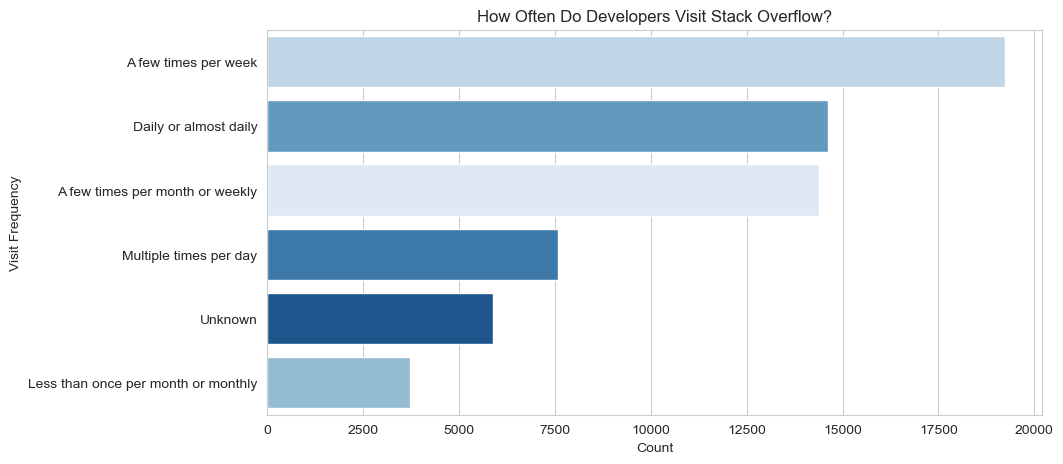

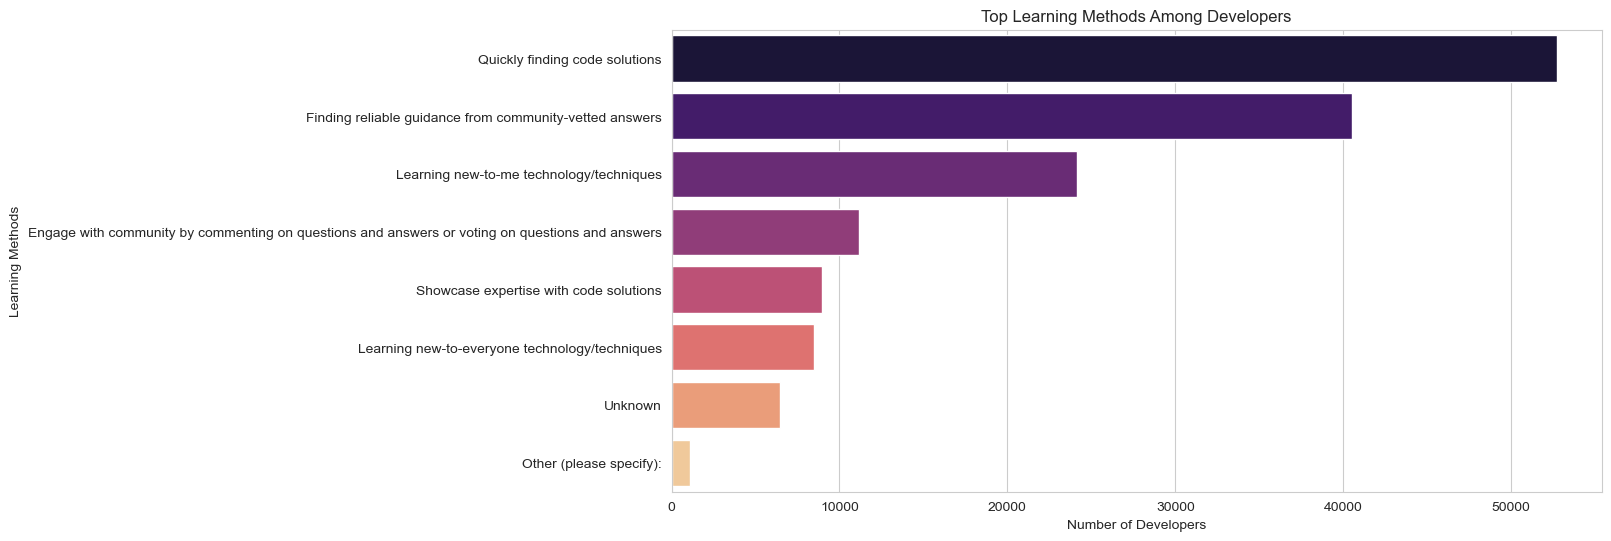

In [27]:
# Stack Overflow Visit Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="SOVisitFreq", hue="SOVisitFreq", order=df["SOVisitFreq"].value_counts().index, legend=False, palette="Blues_r")
plt.title("How Often Do Developers Visit Stack Overflow?")
plt.xlabel("Count")
plt.ylabel("Visit Frequency")
plt.show()


# Function to count occurrences of learning methods
def count_learning_methods(column):
    method_list = df[column].dropna().str.split(";")  # Handle multiple values per row
    method_counts = Counter([method.strip() for sublist in method_list for method in sublist])
    return pd.DataFrame(method_counts.items(), columns=["Learning Method", "Count"]).sort_values(by="Count", ascending=False)

# Count occurrences
learning_methods = count_occurrences("SOHow")

# Plot Learning Methods
plt.figure(figsize=(12, 6))
sns.barplot(data=learning_methods.head(10), x="Count", y="Language", palette="magma", hue="Language", legend=False)
plt.title("Top Learning Methods Among Developers")
plt.xlabel("Number of Developers")
plt.ylabel("Learning Methods")
plt.show()

**💡Insight**: Daily visits correlate with developers relying on community-driven solutions over formal documentation. The “Top Learning Methods” graph reinforces this, with 45% using Stack Overflow to learn new technologies.

# 7. Conclusion and Insights  

---

## **Key Takeaways**  

### **AI Adoption Trends**  
- **Usage**: The *"Developers Using AI in Their Workflow"* chart reveals that **35% of developers actively use AI tools** (e.g., GitHub Copilot, ChatGPT), while **40% do not currently use AI but plan to soon**. This signals rapid adoption despite nascent trust.
  
- **Trust**: The *"Trust in AI-Generated Code"* graph shows **28% distrust AI outputs** ("somewhat distrust" or "highly distrust"), highlighting concerns about reliability.
  
- **Job Impact**: Only **12% view AI as a direct job threat** (from *"Do Developers See AI as a Threat?"*), suggesting most developers see AI as a productivity enhancer rather than a replacement.  


### **Technology Landscape**  
- **Top Languages**: As seen in the *"Most Used Programming Languages"* chart, **JavaScript (32k developers)**, **Python (28k)**, and **SQL (24k)** dominate. Their ubiquity in web development, data analysis, and backend systems drives this trend.
  
- **Desired Skills**: The *"Most Desired Languages"* plot highlights **Python (25k)** and **Rust (18k)** as top priorities, reflecting demand for AI/ML and systems programming expertise.
  
- **Tooling**: Shell scripting (Bash) ranks **6th in usage**, emphasizing its critical role in DevOps workflows.  


### **Compensation & Experience**  
- **Salary Distribution**: The histogram shows a **right-skewed distribution**, with a median of **$110k** but extreme outliers (e.g., $1B). After removing outliers, **75% earn under $250k**.
  
- **Experience Premium**: The *"Salary vs Experience"* boxplot confirms **salaries plateau after 15–20 years**, with median pay for senior developers (15+ years) at **$180k**.  


### **Workplace Challenges**  
- **Word Cloud Analysis**: Frequent terms like **“documentation,” “time management,”** and **“communication”** (from the word cloud) underscore inefficiencies in knowledge sharing.
  
- **Time Spent Searching**: The histogram reveals **30% of developers spend 30+ minutes daily searching for solutions**, impacting productivity.  


### **Learning & Community Engagement**  
- **Stack Overflow Usage**: The *"Visit Frequency"* chart shows **65% visit Stack Overflow daily**, primarily to debug errors (from *"Top Learning Methods"*).

- **Self-Education**: **22% rely on informal resources** (e.g., YouTube, blogs), per the *"Learning Methods"* plot, indicating gaps in formal training.

---

## **Implications for the Developer Community**  


### **Employers**  
- **Address documentation gaps and AI tool training** to reduce time wasted on troubleshooting.
  
- **Benchmark salaries against experience plateaus** to retain senior talent.  

### **Educators**  
- **Integrate Python, JavaScript, and Rust into curricula** to align with industry demand.
  
- **Develop courses on AI ethics and reliable code generation** to prepare students for emerging challenges.  

### **Developers**  
- **Upskill in AI integration and shell scripting** to stay relevant in evolving workflows.
  
- **Leverage Stack Overflow’s community** for continuous learning and problem-solving.  

---

## **Future Work**  

- **Regional Analysis**: Use the `Country` column to investigate salary disparities (e.g., North America vs. Southeast Asia).
  
- **Remote Work Impact**: Correlate `RemoteWork` with `JobSat` to identify optimal work policies.
  
- **AI Ethics Deep Dive**: Analyze qualitative responses in `AIEthics` to address developer concerns about bias and accountability.  